In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/wafic/Downloads/data/Unsupervised data/Wholesale_customers_data.csv')

# Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.
Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'. Consider what each category represents in terms of products you could purchase.

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Subsetting dataframe to exclude Channel and Region
df = data.iloc[:,2:]
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [67, 155, 339, 334]

# Create a DataFrame of the chosen samples
sample = pd.DataFrame(df.iloc[indices], columns=list(df))
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
67,19913,6759,13462,1256,5141,834
155,1989,10690,19460,233,11577,2153
339,2617,1188,5332,9584,573,1942
334,16823,928,2743,11559,332,3486


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.
What kind of establishment (customer) could each of the three samples you've chosen represent?
Hint: Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant.

67: Cafe
I think it is a cafe because it is sure not a restaurant or a house as they are
very low Fresh & Frozen but for groceries and Detergents_Paper they have average 
spending which can be justified due to cleaning bathrooms and tables

155: House
The fact that the spending is not on the first Quartile in any of the products
makes it normal for a house where you buy lots of Fresh products but not in the
thousands, same applies to the rest

339: Retail Store
With minimal spending on Fresh, Milk and Detergents_Paper along with huge 
Frozen and Grocery purchases, it sure not a house nor a restautant or a hotel.

334: Hotel or Restaurant
The huge spending on Detergents_Paper and Grocery makes it very unlikely to be 
house but sure a business but unlikey to be a retailer

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.
#### In the code block below, you will need to implement the following:
- Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
- Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
    - Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
- Import a decision tree regressor, set a random_state, and fit the learner to the training data.
- Report the prediction score of the testing set using the regressor's score function.

In [8]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df.drop('Grocery', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df.Grocery, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
fit = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
# Returns the coefficient of determination R^2 of the prediction
fit.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.579242441671714

In [9]:
# List all possible variables dropped
predictors = list(df)

for variable in predictors:
    new_data = df.drop(variable, axis=1)
    
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, df[variable], test_size=0.25, random_state=42)

    from sklearn.tree import DecisionTreeRegressor
    fit = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
    
    print(variable, 'R^2: ',fit.score(X_test, y_test))

Fresh R^2:  -0.33307053360466754
Milk R^2:  0.17343800937900888
Grocery R^2:  0.6992481966753799
Frozen R^2:  -0.2782491488238512
Detergents_Paper R^2:  0.34877745469093757
Delicassen R^2:  -11.023627900466764


### Question 2
Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?
Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data.

Running an R^2 for every variable seperatly, I noticed that 'Fresh', 'Frozen' and 'Delicassen' is negatively correlated with the other variables implying that these variables are different and will assist in clustering

#### Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

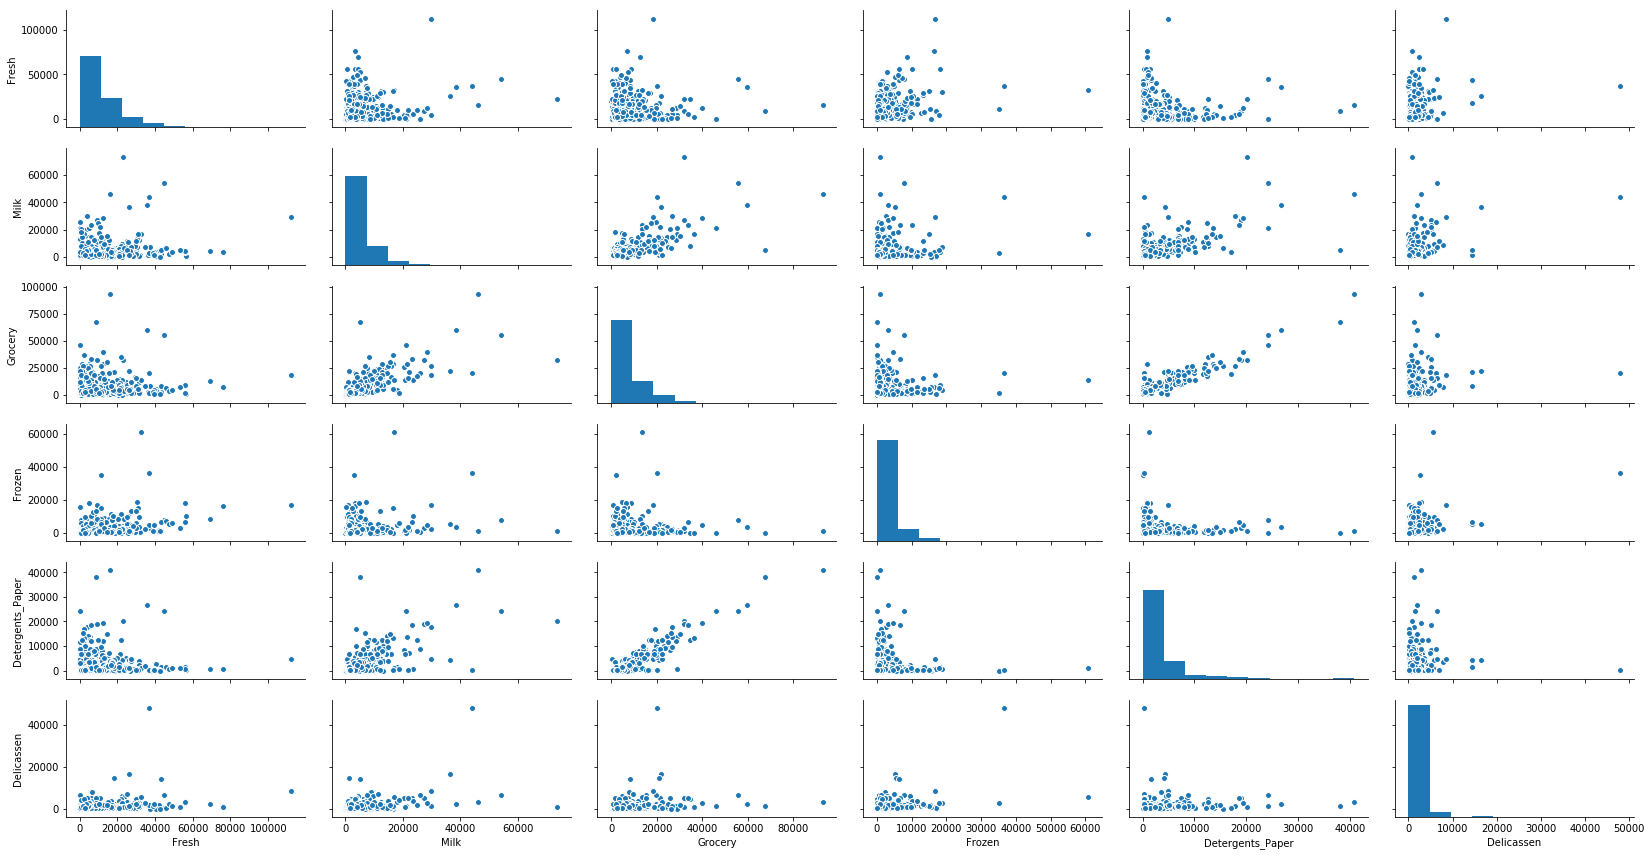

In [10]:
# Produce a scatter matrix for each pair of features in the data
sns.pairplot(df, size=2, aspect=1.9)

### Question 3

Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?
Hint: Is the data normally distributed? Where do most of the data points lie?

- Detergent_Paper and Grocery seem to have some correlation
- Grocery and Milk as well
- Little correlation as well between Milk and and Detergents_Paper

This proves our earlier discovery that maybe these variables are not very helpful in clustering the clients. Also, we can notice that the data is right skewed.

# Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.
In the code block below, you will need to implement the following:
- Assign a copy of the data to log_data after applying a logarithm scaling. Use the np.log function for this.
- Assign a copy of the sample data to log_samples after applying a logrithm scaling. Again, use np.log.


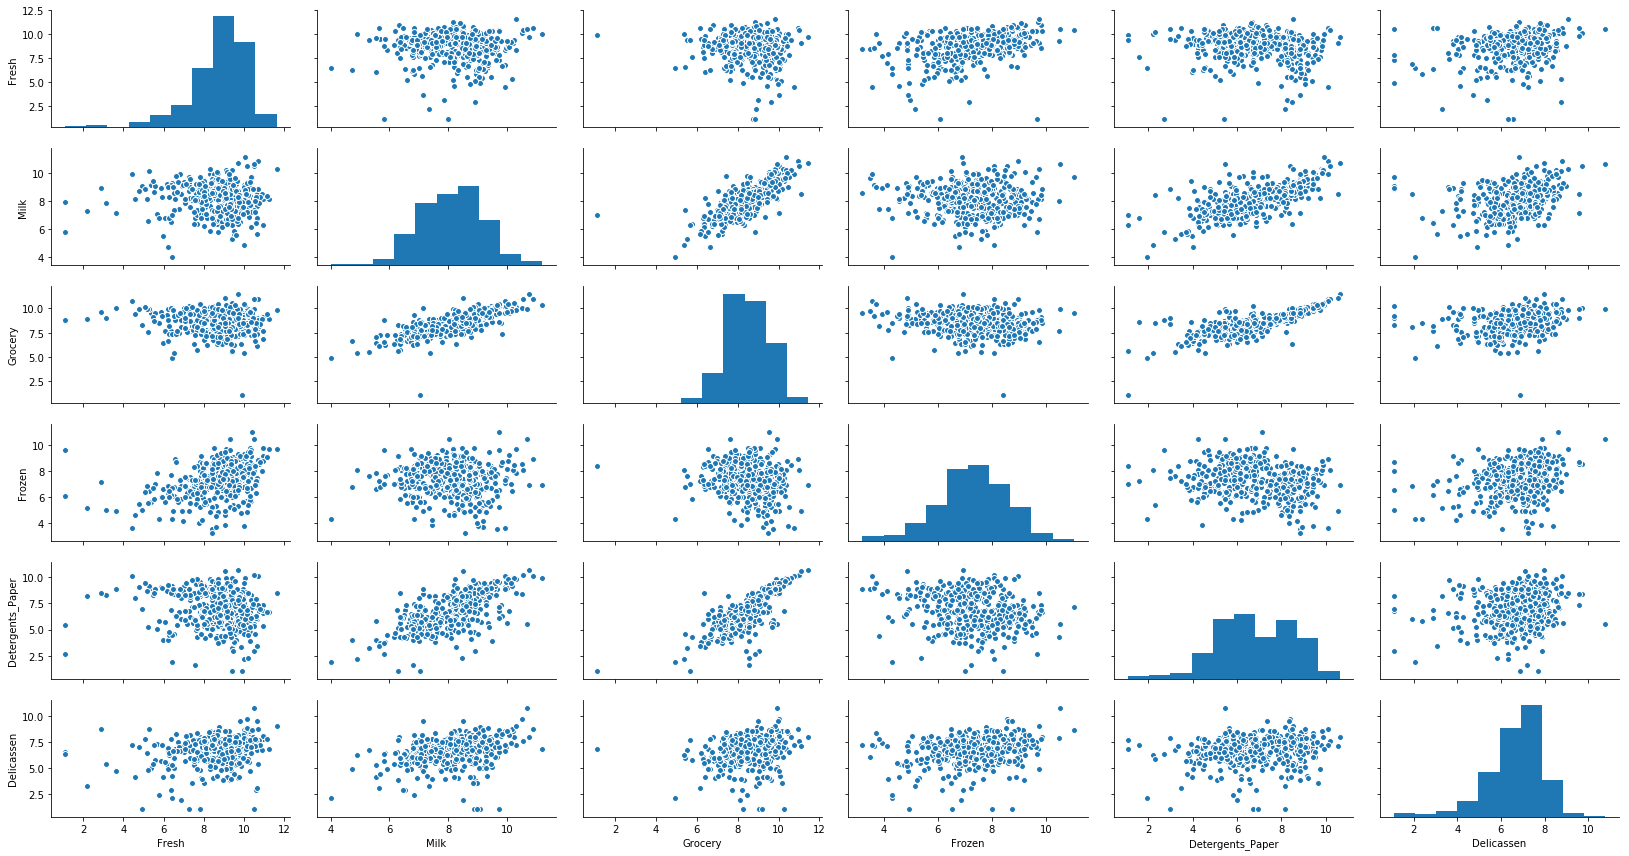

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(df)

# TODO: Scale the sample data using the natural logarithm
log_sample = np.log(sample)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, size=2, aspect=1.9)

After applying natural logarithm, we see that the data is now normally distributed and correlations are more visible

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
- Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
- Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
- Assign the calculation of an outlier step for the given feature to step.

Optionally remove data points from the dataset by adding indices to the outliers list.
NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [12]:
predictors = list(df)

outlier_indices = []

for var in predictors:
    Q1 = np.percentile(log_data[var], .25)
    Q3 = np.percentile(log_data[var], .75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    higher = Q3 + (1.5 * IQR)
    outliers = log_data[~((log_data[var] <= lower) | (log_data[var] >= higher))]
    print('Feature is: ', var)
    display(outliers)
    
    outlier_indices.append(outliers.index.tolist())

import itertools
outlier_list = list(itertools.chain.from_iterable(outlier_indices)) 

Feature is:  Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
170,5.560682,9.068201,9.505246,7.017506,8.855806,5.777652
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669


Feature is:  Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
88,8.970051,6.295266,8.304495,9.183483,5.105945,3.828641
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
186,8.009363,6.255750,6.749931,8.151910,6.855409,6.588926
191,9.519588,5.686975,7.230563,6.791221,3.761200,4.430817
219,8.332068,5.905362,7.237059,7.743270,4.454347,4.867534


Feature is:  Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
275,6.522093,7.383989,5.407172,6.759255,4.564348,5.937536
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Feature is:  Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446


Feature is:  Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
402,10.186371,8.466531,8.535230,5.393628,2.302585,5.828946


Feature is:  Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612


#### Question 4
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why.

In [13]:
outlier_list
duplicate = []
unique = []

for i in outlier_list:
    if i not in unique:
        unique.append(i)
    else:
        duplicate.append(i)
set(duplicate)

{65, 122, 128, 142, 154, 161, 338, 356}

In [14]:
good_data = log_data.drop(log_data.index[duplicate])
print ('Number of Dropped Observations: ', len(outlier_list))
good_data.info()

Number of Dropped Observations:  61
<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 439
Data columns (total 6 columns):
Fresh               432 non-null float64
Milk                432 non-null float64
Grocery             432 non-null float64
Frozen              432 non-null float64
Detergents_Paper    432 non-null float64
Delicassen          432 non-null float64
dtypes: float64(6)
memory usage: 23.6 KB


We have 13 points that are duplicates for more than one feature, for these points I have dropped them and we eneded up with the good_data of size 432 observations

# Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

#### Implementation: PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
- Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
- Apply a PCA transformation of the sample log-data log_samples using pca.transform, and assign the results to pca_samples.

In [22]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit_transform(good_data) 

# TODO: Transform the sample log-data using the PCA fit above
pca_sample = pca.transform(log_sample) 

# Generate PCA results plot
pca_df = pd.DataFrame.from_records(pca.components_, columns=good_data.columns, index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
pca_df.T

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
Fresh,0.206922,-0.658602,-0.676153,-0.257377,-0.000696,0.000745
Milk,-0.384299,-0.192178,0.075111,-0.014995,0.732805,0.522027
Grocery,-0.455720,-0.103253,-0.049311,0.024123,0.324135,-0.820720
Frozen,0.197735,-0.501152,0.241828,0.805965,-0.007219,-0.040438
Detergents_Paper,-0.739546,-0.067654,-0.242927,0.218858,-0.538320,0.227582
Delicassen,-0.125659,-0.512757,0.645949,-0.485254,-0.260944,-0.021847


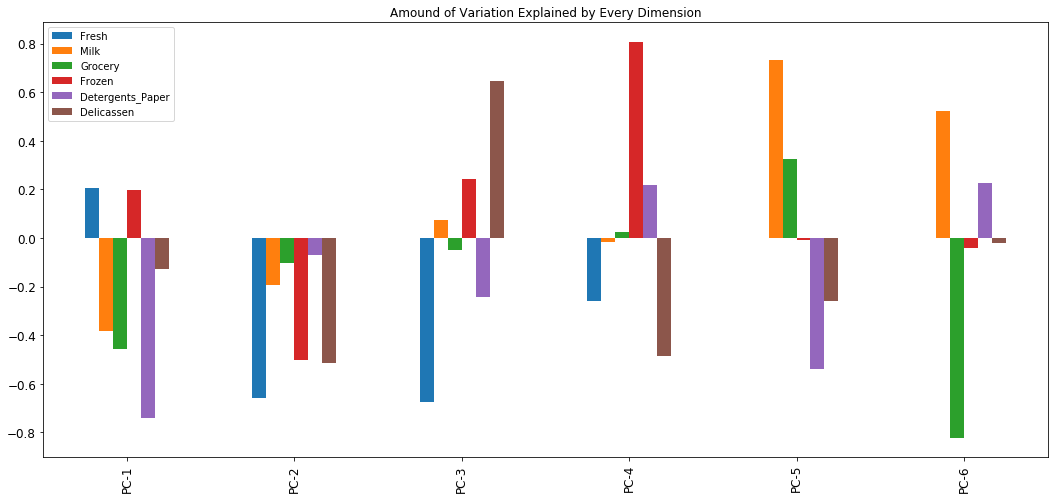

In [16]:
pca_df.plot(kind='bar', figsize=(18,8), title="Amound of Variation Explained by Every Dimension", fontsize=12)

In [26]:
pca_df['Explained_Variance'] = pca.explained_variance_ratio_
pca_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Explained_Variance
PC-1,0.206922,-0.384299,-0.455720,0.197735,-0.739546,-0.125659,0.440992
PC-2,-0.658602,-0.192178,-0.103253,-0.501152,-0.067654,-0.512757,0.276464
PC-3,-0.676153,0.075111,-0.049311,0.241828,-0.242927,0.645949,0.113700
PC-4,-0.257377,-0.014995,0.024123,0.805965,0.218858,-0.485254,0.100087
PC-5,-0.000696,0.732805,0.324135,-0.007219,-0.538320,-0.260944,0.045145
PC-6,0.000745,0.522027,-0.820720,-0.040438,0.227582,-0.021847,0.023612


### Question 5
How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the indivdual feature weights.

In [18]:
# Percentage of variation explained by first 2 components
round(pca_df.Explained_Variance[:2].sum()*100, 2)

71.75

In [19]:
# Percentage of variation explained by first 4 components
round(pca_df.Explained_Variance[:4].sum()*100, 2)

93.12

PC-1: An increase in PC1 is associated with a large decrease in 'Milk', 'Grocey' and 'Detergent_Paper' and there is a negative correlation to this component, thus as this component increases as these original variables decrease meaning little to no sales in these original variables. It also implies that these 3 original variables vary together.
PC-2: An increase in PC2 is associated with a large decrease in "Delicatessen", "Frozen", "Fresh" spending. These variables vary together and are negatively correlated to this component
PC-3: An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending
PC-4: An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending

#### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [25]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_sample, 4), columns = pca_df.index.values))

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,-1.7995,-1.0263,-1.2098,-0.0608,-0.0930,-0.1109
1,-3.6729,0.6678,0.3721,-1.1061,-0.3084,0.0564
2,0.7891,-0.5634,1.6478,1.2128,-0.7200,-0.8599
3,1.9391,-2.0298,0.9597,0.4692,-0.9779,-0.5865
